<center><h1>DSCI-552 HW1</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### I Chen Yang
### GitHub ID:ichenyang
### 8260207588

In [1]:
import pandas as pd
import numpy as np

## (a) 

In [2]:

#data_2C=pd.read_table("column_2C.dat", sep="\s+",header=None)
data_2C=pd.read_table("../data/column_2C.dat", sep="\s+",header=None)

data_2C.columns = ['a', 'b', 'c', 'd', 'e','f','Class']
data_2C= data_2C[(data_2C.Class=='AB') | (data_2C.Class=='NO')]
data_2C=data_2C.replace('AB',1)
data_2C=data_2C.replace('NO',0)
data_2C



,a,b,c,d,e,f,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


## b (i)

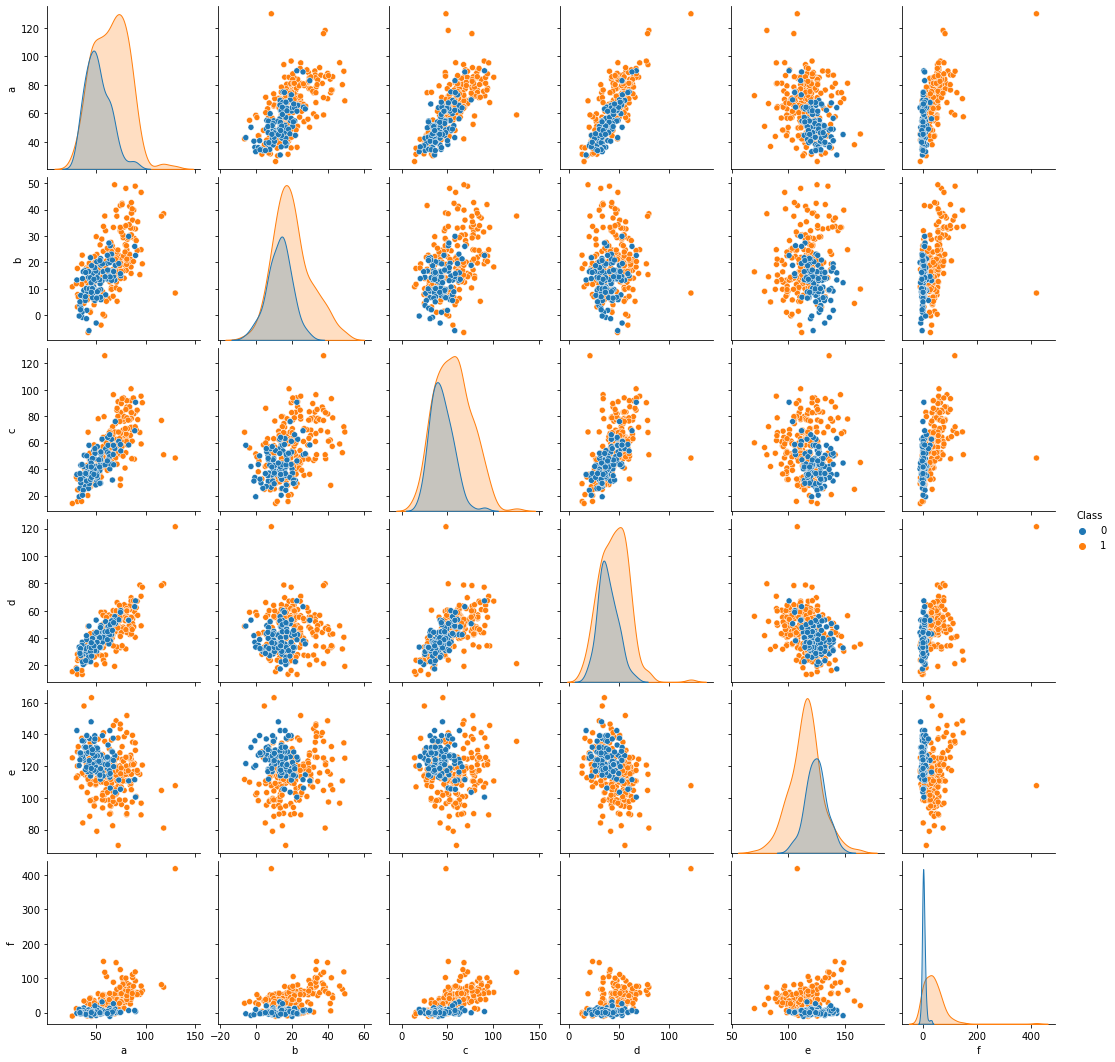

In [3]:
import seaborn as sns

sns.pairplot(data_2C, hue="Class")

## b (ii)

<AxesSubplot:xlabel='Class', ylabel='f'>

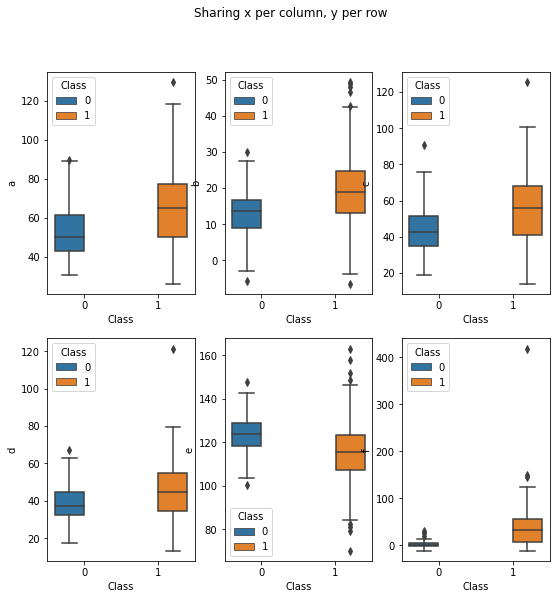

In [4]:
import matplotlib.pyplot as plt
Com_2C=pd.melt(data_2C,id_vars='Class')

#sns.boxplot(data = data_2C,x='Class', y="a", hue='Class')
#sns.boxplot(data = data_2C,x='Class', y="b", hue='Class')
#sns.boxplot(data = data_2C,x='Class', y="c", hue='Class')
#sns.boxplot(data = data_2C,x='Class', y="d", hue='Class')
#sns.boxplot(data = data_2C,x='Class', y="e", hue='Class')
#plt.show()

fig, axes=plt.subplots(2,3,figsize=(9,9))
fig.suptitle('Sharing x per column, y per row')

sns.boxplot(data = data_2C,x='Class', y="a", hue='Class',ax=axes[0,0])
sns.boxplot(data = data_2C,x='Class', y="b", hue='Class',ax=axes[0,1])
sns.boxplot(data = data_2C,x='Class', y="c", hue='Class',ax=axes[0,2])
sns.boxplot(data = data_2C,x='Class', y="d", hue='Class',ax=axes[1,0])
sns.boxplot(data = data_2C,x='Class', y="e", hue='Class',ax=axes[1,1])
sns.boxplot(data = data_2C,x='Class', y="f", hue='Class',ax=axes[1,2])


#for ax in fig.get_axes():
#    ax.label_outer()
        

## (b) iii

In [5]:
Class_1=data_2C.iloc[:140, :]
Class_0=data_2C[(data_2C.Class==0)].iloc[:70,: ]
#Class_0
result = pd.concat([Class_1,Class_0])
result
#Com_result=pd.melt(result,id_vars='Class')
#Com_result
#Com_2C
#result.iloc[:, 0:6]

Class_1_t=data_2C.iloc[140:210, :]
Class_0_t=data_2C.iloc[280:,: ]
#Class_0
result_t = pd.concat([Class_1_t,Class_0_t])
result

,a,b,c,d,e,f,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,0
276,51.33,13.63,33.26,37.69,131.31,1.79,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,0
278,40.41,-1.33,30.98,41.74,119.34,-6.17,0


## c (i)

In [6]:
from scipy.spatial import distance
a=[]
Class=[]
for i in  range(len(result)):
    b=result.iloc[0,0:6].to_numpy()
    c=result.iloc[i,0:6].to_numpy()
    a.append(distance.euclidean(b, c))
    Class.append(result.iloc[i,6])
    
dist_euc=pd.DataFrame()
dist_euc=dist_euc.assign(Distance_Euclidean=a,Class=Class)
dist_euc.sort_values(by=['Distance_Euclidean'])


,Distance_Euclidean,Class
0,0.000000,1
149,14.790412,0
3,14.989666,1
2,15.668344,1
29,18.398935,1
...,...,...
71,112.472142,1
76,125.424093,1
95,156.677874,1
75,157.982569,1


## c (ii)

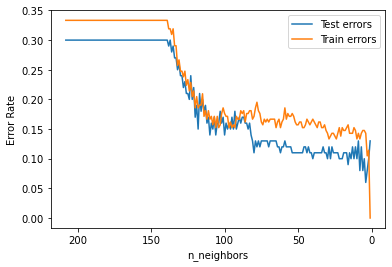

The optimal k* is 3 and the value is 0.06000000000000005
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X_train=result.iloc[:, 0:6]
y_train=result.Class
X_test=result_t.iloc[:, 0:6]
y_test=result_t.Class

neighbors = list(range(1,209,1))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
train_error = np.empty(len(neighbors))
test_error = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    # Compute training and test data error rate
    train_error[i]=1-train_accuracy[i]
    test_error[i]=1-test_accuracy[i]
    #print(test_accuracy)
# Generate plot
plt.plot(neighbors, test_error, label = 'Test errors')
plt.plot(neighbors, train_error, label = 'Train errors')
plt.gca().invert_xaxis() 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.show()


val, idx = min((val, idx) for (idx, val) in enumerate(test_error))

print("The optimal k* is" ,idx, "and the value is",val)
# We can find that k=4 the most suitable k.
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
#knn_4.score(X_train, y_train)
y_pred = knn_4.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))



In [8]:
pd.DataFrame(cm)

,0,1
0,25,5
1,1,69


In [9]:
from sklearn.metrics import f1_score
F1=f1_score(y_test, y_pred)
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
TN = cm[0][0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
precision=TP/(TP+FP)
print("true positive rate is", TPR)
print("true negative rate is", TNR)
print("F1-score is ", F1)
print("precision is",precision)

true positive rate is 0.9857142857142858
true negative rate is 0.8333333333333334
F1-score is  0.9583333333333333
precision is 0.9324324324324325


### c (iii)

Text(0.5, 1.0, 'Learning Curve')

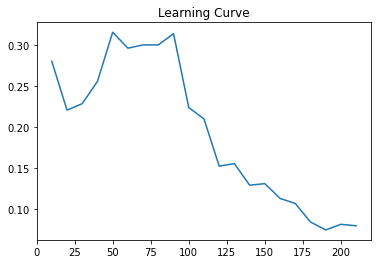

In [10]:
N_array= list(range(10,220,10))
neighbors = list(range(1,197,5))
train_accuracy_c = np.empty(len(neighbors))
test_accuracy_c = np.empty(len(neighbors))
train_error_c = np.empty(len(neighbors))
test_error_c = np.empty(len(neighbors))
ACC=[]
# Loop over K values
for i in (N_array):
    N0=round(i/3)
    N1=i-round(i/3)
    Class_1=result.iloc[:N1, :]
    Class_0=data_2C[(data_2C.Class==0)].iloc[:N0,: ]
    result_c = pd.concat([Class_1,Class_0])
        
    Class_1_t=data_2C.iloc[N1:210, :]
    Class_0_t=data_2C.iloc[N0+210:,: ]
    result_t_c= pd.concat([Class_1_t,Class_0_t])
        
    X_train_c=result_c.iloc[:, 0:6]
    y_train_c=result_c.Class
    X_test_c=result_t_c.iloc[:, 0:6]
    y_test_c=result_t_c.Class
    neighbors = list(range(1,i,5))
    test_accuracy_c = np.empty(len(neighbors))
    test_error_c = np.empty(len(neighbors))
    for j, k in enumerate(neighbors):
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_c, y_train_c)
        
        test_accuracy_c[j] = knn.score(X_test_c, y_test_c)
        
        test_error_c[j]=1-test_accuracy_c[j]
    #print(test_error_c.min())    
    ACC.append(test_error_c.min())

plt.plot(N_array, ACC)
plt.title('Learning Curve')   


## (d) i. A.

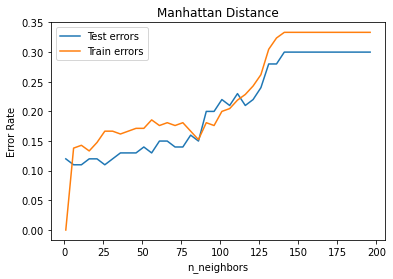

Tset error rate with Manhattan Distance is [0.12 0.11 0.11 0.12 0.12 0.11 0.12 0.13 0.13 0.13 0.14 0.13 0.15 0.15
 0.14 0.14 0.16 0.15 0.2  0.2  0.22 0.21 0.23 0.21 0.22 0.24 0.28 0.28
 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
The minimum test error rate is  and the value is 0.10999999999999999
The optimal k* is 6 and the value is 0.10999999999999999


In [11]:
from sklearn.neighbors import DistanceMetric


X_train=result.iloc[:, 0:6]
y_train=result.Class
X_test=result_t.iloc[:, 0:6]
y_test=result_t.Class

# Minkowski Distance
neighbors = list(range(1,197,5))
train_accuracy_min = np.empty(len(neighbors))
test_accuracy_min = np.empty(len(neighbors))
train_error_min = np.empty(len(neighbors))
test_error_min = np.empty(len(neighbors))



for i, k in enumerate(neighbors):
    KNN_min = KNeighborsClassifier(n_neighbors = k, p =1, metric='minkowski')
    KNN_min.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy_min[i] = KNN_min.score(X_train, y_train)
    test_accuracy_min[i] = KNN_min.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_min[i]=1-train_accuracy_min[i]
    test_error_min[i]=1-test_accuracy_min[i]

# Generate plot
plt.plot(neighbors, test_error_min, label = 'Test errors')
plt.plot(neighbors, train_error_min, label = 'Train errors')
 
plt.legend()
#plt.gca().invert_xaxis() 
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.title('Manhattan Distance') 
plt.show()

print('Tset error rate with Manhattan Distance is',test_error_min)
print('The minimum test error rate is  and the value is',test_error_min.min())
val, idx = min((val, idx) for (idx, val) in enumerate(test_error_min))

print("The optimal k* is" ,(idx*5)+1, "and the value is",val)

### d (i) B

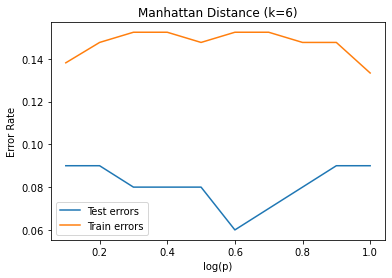

Tset error rate with Mahalanobis Distance is [0.09 0.09 0.08 0.08 0.08 0.06 0.07 0.08 0.09 0.09]
The minimum test error rate with k=6 is log(p)=0.6 and the value is 0.06000000000000005


In [12]:
# k=6 find the best p (Manhattan distance).

log_p_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

train_accuracy_mah = np.empty(len(log_p_list))
test_accuracy_mah = np.empty(len(log_p_list))
train_error_mah = np.empty(len(log_p_list))
test_error_mah = np.empty(len(log_p_list))


for j, k in enumerate(log_p_list):
    a=pow(10,k)
    KNN_mah = KNeighborsClassifier(n_neighbors = 6, p=a ,metric='minkowski')
    KNN_mah.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy_mah[j] = KNN_mah.score(X_train, y_train)
    test_accuracy_mah[j] = KNN_mah.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_mah[j]=1-train_accuracy_mah[j]
    test_error_mah[j]=1-test_accuracy_mah[j]
    

# Generate plot
plt.plot(log_p_list, test_error_mah, label = 'Test errors')
plt.plot(log_p_list, train_error_mah, label = 'Train errors')
 
plt.legend()
plt.xlabel('log(p)')
plt.ylabel('Error Rate')
plt.title('Manhattan Distance (k=6)') 
plt.show()

print('Tset error rate with Mahalanobis Distance is',test_error_mah)
print('The minimum test error rate with k=6 is log(p)=0.6 and the value is',test_error_mah.min())

### d (i) C

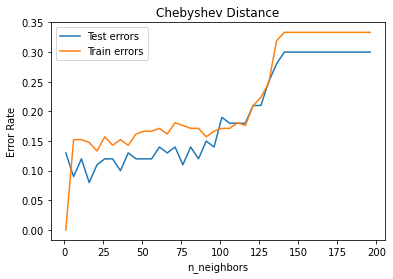

Tset error rate with Chebyshev Distance is [0.13 0.09 0.12 0.08 0.11 0.12 0.12 0.1  0.13 0.12 0.12 0.12 0.14 0.13
 0.14 0.11 0.14 0.12 0.15 0.14 0.19 0.18 0.18 0.18 0.21 0.21 0.25 0.28
 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
The optimal k* is 16 and the value is 0.07999999999999996


In [13]:
# Chebyshev Distance
neighbors = list(range(1,197,5))
train_accuracy_che = np.empty(len(neighbors))
test_accuracy_che = np.empty(len(neighbors))
train_error_che = np.empty(len(neighbors))
test_error_che = np.empty(len(neighbors))



for i, k in enumerate(neighbors):
    KNN_che = KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    KNN_che.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy_che[i] = KNN_che.score(X_train, y_train)
    test_accuracy_che[i] = KNN_che.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_che[i]=1-train_accuracy_che[i]
    test_error_che[i]=1-test_accuracy_che[i]


    
# Generate plot
plt.plot(neighbors, test_error_che, label = 'Test errors')
plt.plot(neighbors, train_error_che, label = 'Train errors')
 
plt.legend()
#plt.gca().invert_xaxis() 
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.title('Chebyshev Distance') 
plt.show()
print('Tset error rate with Chebyshev Distance is',test_error_che)

val, idx = min((val, idx) for (idx, val) in enumerate(test_error_che))

print("The optimal k* is" ,(idx)*5+1, "and the value is",val)

## d (ii)

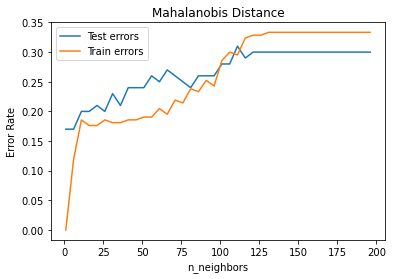

Tset error rate with Manhattan Distance is [0.17 0.17 0.2  0.2  0.21 0.2  0.23 0.21 0.24 0.24 0.24 0.26 0.25 0.27
 0.26 0.25 0.24 0.26 0.26 0.26 0.28 0.28 0.31 0.29 0.3  0.3  0.3  0.3
 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
The optimal k* is 1 and the value is 0.17000000000000004


In [14]:
# Mahalanobis Distance

neighbors = list(range(1,197,5))
train_accuracy_ma = np.empty(len(neighbors))
test_accuracy_ma = np.empty(len(neighbors))
train_error_ma = np.empty(len(neighbors))
test_error_ma = np.empty(len(neighbors))



for i, k in enumerate(neighbors):
    KNN_ma = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis',\
                                  metric_params={'V':np.cov(X_train.T),\
                                  "VI":np.linalg.inv(np.cov(X_train.T))})


    KNN_ma.fit(X_train, y_train)
    y_pred=KNN_ma.predict(X_test)
    # Compute training and test data accuracy
    train_accuracy_ma[i] = KNN_ma.score(X_train, y_train)
    test_accuracy_ma[i] = KNN_ma.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_ma[i]=1-train_accuracy_ma[i]
    test_error_ma[i]=1-test_accuracy_ma[i]

# Generate plot
plt.plot(neighbors, test_error_ma, label = 'Test errors')
plt.plot(neighbors, train_error_ma, label = 'Train errors')
 
plt.legend()
#plt.gca().invert_xaxis() 
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.title('Mahalanobis Distance') 
plt.show()
print('Tset error rate with Manhattan Distance is',test_error_ma)
val, idx = min((val, idx) for (idx, val) in enumerate(test_error_ma))

print("The optimal k* is" ,(idx)*5+1, "and the value is",val)
    

## (e) 

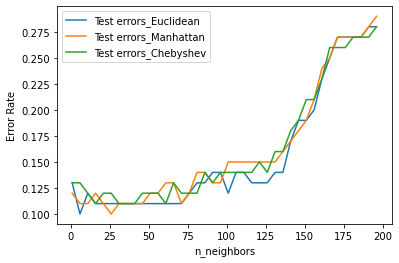

Tset error rate with Euclidean Distance is [0.13 0.1  0.12 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11
 0.11 0.12 0.13 0.13 0.14 0.14 0.12 0.14 0.14 0.13 0.13 0.13 0.14 0.14
 0.17 0.19 0.19 0.2  0.23 0.25 0.27 0.27 0.27 0.27 0.28 0.28]
The optimal k* is 6 and the value is 0.09999999999999998
Tset error rate with Manhattan Distance is [0.17 0.17 0.2  0.2  0.21 0.2  0.23 0.21 0.24 0.24 0.24 0.26 0.25 0.27
 0.26 0.25 0.24 0.26 0.26 0.26 0.28 0.28 0.31 0.29 0.3  0.3  0.3  0.3
 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
The optimal k* is 26 and the value is 0.09999999999999998
Tset error rate with Chebyshev Distance is [0.13 0.13 0.12 0.11 0.12 0.12 0.11 0.11 0.11 0.12 0.12 0.12 0.11 0.13
 0.12 0.12 0.12 0.14 0.13 0.14 0.14 0.14 0.14 0.14 0.15 0.14 0.16 0.16
 0.18 0.19 0.21 0.21 0.23 0.26 0.26 0.26 0.27 0.27 0.27 0.28]
The optimal k* is 16 and the value is 0.10999999999999999


In [15]:
neighbors = list(range(1,197,5))
#Euclidean
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
train_error = np.empty(len(neighbors))
test_error = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    # Compute training and test data error rate
    train_error[i]=1-train_accuracy[i]
    test_error[i]=1-test_accuracy[i]
#   Manhattan Distance 
train_accuracy_min = np.empty(len(neighbors))
test_accuracy_min = np.empty(len(neighbors))
train_error_min = np.empty(len(neighbors))
test_error_min = np.empty(len(neighbors))   
    
for i, k in enumerate(neighbors):
    KNN_min = KNeighborsClassifier(n_neighbors = k, p =1, metric='manhattan',weights='distance')
    KNN_min.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy_min[i] = KNN_min.score(X_train, y_train)
    test_accuracy_min[i] = KNN_min.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_min[i]=1-train_accuracy_min[i]
    test_error_min[i]=1-test_accuracy_min[i]


# Chebyshev Distance
train_accuracy_che = np.empty(len(neighbors))
test_accuracy_che = np.empty(len(neighbors))
train_error_che = np.empty(len(neighbors))
test_error_che = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    KNN_che = KNeighborsClassifier(n_neighbors = k, metric='chebyshev',weights='distance')
    KNN_che.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy_che[i] = KNN_che.score(X_train, y_train)
    test_accuracy_che[i] = KNN_che.score(X_test, y_test)
    # Compute training and test data error rate
    train_error_che[i]=1-train_accuracy_che[i]
    test_error_che[i]=1-test_accuracy_che[i]
    
# Generate plot
plt.plot(neighbors, test_error, label = 'Test errors_Euclidean')
plt.plot(neighbors, test_error_min, label = 'Test errors_Manhattan')
plt.plot(neighbors, test_error_che, label = 'Test errors_Chebyshev')

 
plt.legend()

plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.show()

print('Tset error rate with Euclidean Distance is',test_error)
val, idx = min((val, idx) for (idx, val) in enumerate(test_error))
print("The optimal k* is" ,(idx)*5+1, "and the value is",val)

print('Tset error rate with Manhattan Distance is',test_error_ma)
val, idx = min((val, idx) for (idx, val) in enumerate(test_error_min))
print("The optimal k* is" ,(idx)*5+1, "and the value is",val)

print('Tset error rate with Chebyshev Distance is',test_error_che)
val, idx = min((val, idx) for (idx, val) in enumerate(test_error_che))
print("The optimal k* is" ,(idx)*5+1, "and the value is",val)

## (f)

Ans: The lowest training error rate is 0